In [1]:
import embedding as emb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Using TensorFlow backend.


In [2]:
## import train and test data
train = pd.read_csv('data/train_2021-12-24.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99144 entries, 0 to 99143
Data columns (total 19 columns):
adv_date              99144 non-null object
sld_date              99144 non-null object
make_date             99144 non-null object
Sale_Price            99144 non-null float64
Odometer              99119 non-null float64
Power                 99090 non-null float64
Fuel_Urban            87810 non-null float64
Make_Code             99144 non-null object
Family_Code           99144 non-null object
Region_Description    99144 non-null object
Vehicle_Code          99144 non-null int64
inventory_days        99144 non-null int64
age_list_day          99144 non-null int64
age_sell_day          99144 non-null int64
km_per_day            99119 non-null float64
fuel_per_power        87810 non-null float64
odo_per_fuel          87789 non-null float64
odo_per_power         99065 non-null float64
pow_times_odo         99065 non-null float64
dtypes: float64(9), int64(4), object(6)
memory usa

In [4]:
train.select_dtypes('object').columns

Index(['adv_date', 'sld_date', 'make_date', 'Make_Code', 'Family_Code',
       'Region_Description'],
      dtype='object')

In [5]:
cat_cols = ['Make_Code', 'Family_Code', 'Region_Description']


embedding_info = emb.get_embedding_info(train,categorical_variables=cat_cols,max_n=2)
embedding_info

{'Make_Code': (62, 2), 'Family_Code': (570, 2), 'Region_Description': (7, 2)}

In [6]:
X_encoded, encoders = emb.get_label_encoded_data(train.loc[:,['Make_Code', 'Family_Code', 'Region_Description']])
X_encoded.head()

,Make_Code,Family_Code,Region_Description
0,58,408,6
1,43,367,4
2,15,480,3
3,25,502,6
4,21,133,0


In [7]:
y_train = train.Sale_Price

In [8]:
y_train.shape

(99144,)

In [9]:
# ce.get_embeddings trains NN, extracts embeddings and return a dictionary containing the embeddings
embeddings = emb.get_embeddings(X_encoded, y_train, categorical_embedding_info=embedding_info, 
                               is_classification=False, epochs=100,batch_size=256)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Epoch: 0 - loss: 481169632.000, r2: -1.739:  99%|█████████▉| 78848/79315 [00:07<00:00, 11707.38it/s]
Epoch: 0 - loss: 479520118.393, r2: -0.915, val_loss: 384867594.493, val_r2: 0.146: 100%|██████████| 79315/79315 [00:08<00:00, 9257.87it/s]
Epoch: 1 - loss: 155902240.000, r2: 0.365:  99%|█████████▉| 78848/79315 [00:07<00:00, 11369.18it/s]
Epoch: 1 - loss: 155483407.549, r2: 0.427, val_loss: 286007068.225, val_r2: 0.385: 100%|██████████| 79315/79315 [00:07<00:00, 10478.84it/s][A
Epoch: 2 - loss: 126725904.000, r2: 0.530:  99%|█████████▉| 78848/79315 [00:07<00:00, 10419.48it/s]
Epoch: 2 - loss: 126473610.799, r2: 0.537, val_loss: 256673175.278, val_r2: 0.447: 100%|██████████| 79315/79315 [00:07<00:00, 10229.51it/s][A
Epoch: 3 - loss: 117968504.000, r2: 0.565:  98%|█████████▊| 78080/79315 [00:06<00:00, 11157.02it/s]
Epoch: 3 - loss: 117461874.459, r2: 0.564, val_loss: 244230574.278, val_r2: 0.468: 100%|██████████| 79315/79315 [00:07<00:00, 10675.87it/s][A
Epoch: 4 - loss: 112619424.000, r

In [10]:
dfs = emb.get_embeddings_in_dataframe(embeddings=embeddings, encoders=encoders)

100%|██████████| 3/3 [00:00<00:00, 871.03it/s]


In [11]:
dfs.keys()

dict_keys(['Make_Code', 'Family_Code', 'Region_Description'])

In [12]:
def label_point(x, y, df, ax):
    for i, point in df.iterrows():
        ax.text(point[x]+.02, point[y], str(i))

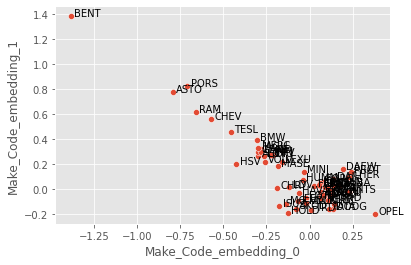

In [26]:
prefix = 'Make_Code'
x,y = 0,1


ax = sns.scatterplot(
    x=f'{prefix}_embedding_{x}',
    y=f'{prefix}_embedding_{y}', 
    data=dfs[prefix], legend='auto')

label_point(f'{prefix}_embedding_{x}', 
            f'{prefix}_embedding_{y}',
            dfs[prefix], ax)

plt.show()

In [14]:
from sklearn.decomposition import PCA

In [19]:
# save embeddings

df = dfs['Make_Code']

In [20]:
n_dict = dict()

for i in range(df.shape[1]+1):
    pca = PCA(n_components=i)
    pca.fit(df)
    n_dict[i] = pca.explained_variance_ratio_

In [21]:
print(pca.explained_variance_ratio_)

[0.93996493 0.06003507]


In [22]:
n_dict

{0: array([], dtype=float64),
 1: array([0.93996493]),
 2: array([0.93996493, 0.06003507])}

In [47]:
import pickle

with open('./data/embeddings.pkl', 'wb') as handle:
    pickle.dump(dfs, handle)
    
with open('./data/encoders.pkl', 'wb') as handle:
    pickle.dump(encoders, handle)

In [46]:
with open('./data/embeddings.pkl', 'rb') as handle:
    embeds = pickle.load(handle)
    
with open('./data/encoders.pkl', 'rb') as handle:
    encs = pickle.load(handle)

In [34]:
ll -h ./data/

total 61M
-rw-r--r-- 1 root  12K Aug 21 13:18 embeddings.pkl
-rw-r--r-- 1 root 5.3K Aug 21 13:18 encoders.pkl
-rw-r--r-- 1 root  13M Aug 21 14:14 saleprice_dataset.csv
-rw-r--r-- 1 root  21M Aug 21 14:17 sales.csv
-rw-r--r-- 1 root 3.2M Aug 21 14:17 test_2022-08-08.csv
-rw-r--r-- 1 root 7.4M Aug 21 14:15 train_2021-11-23.csv
-rw-r--r-- 1 root  18M Aug 21 14:17 train_2021-12-24.csv


In [48]:
encoders

{'Make_Code': __LabelEncoder__(),
 'Family_Code': __LabelEncoder__(),
 'Region_Description': __LabelEncoder__()}